# Vibration of Single Degree of Freedom Systems 

## Damped vibrations

Code for numerical solution of a damped single degree of freeom system using Euler's method for the equation:
$$
   m\ddot{x}\ + c\dot{x} + kx = 0
$$
$$
      x(t=0)=0.05,  \dot{x}(t=0)=0
$$
$$
      m=5kg, k=30000 \frac{N}{m}, c=50
$$






In [1]:
import matplotlib.pyplot as plt
import math


In [2]:
class SDOFOscillator:

    def __init__(self, m, c, k, h=0.0001, time_duration=2 ):
        self.m = m
        self.c = c
        self.k = k
        self.h = h
        self.duration = time_duration
        self.x0 = 0.05
        self.z0 = 0.0
        self.x0_prime = 0.0
        self.t = []
        self.x = []
        self.z = []
        self.z_prime = []
        self.x_true = []
        self.time_true = []


    def calc_z(self, zi, xi):
        return zi - (((self.c * zi) + (self.k * xi)) * self.h / self.m)

    def calc_z_prime(self, zi, xi):
        return -1.0 * (((self.c * zi) + (self.k * xi)) * self.h / self.m)

    def calc_x(self, xi, zi):
        return xi + (zi * self.h)


    def compute_analytical(self):
        wn = math.sqrt(self.k / self.m)
        chi = self.c / (2 * self.m * wn)
        wd = wn * math.sqrt(1 - (chi * chi))
        A = self.x0
        B = (self.x0_prime + (chi * wn * self.x0)) / wd

        xt = []

        time = np.arange(0.0, self.duration, 0.0001)

        for i in range(len(time)):
            xt_new = math.exp(-chi * wn * time[i]) * \
                     (A * math.cos(wd * time[i]) + B * math.sin(wd * time[i]))

            xt.append(xt_new)

        self.x_true = xt
        self.time_true = time


    def compute_euler(self):
        self.t = np.arange(0.0, self.duration, self.h)
        print(f"Euler duration {self.duration}")
        print(f"Euler time step {self.h}")
        print(f"Euler c {self.c}")
        self.x = [self.x0]
        self.z = [self.z0]
        self.z_prime = [0]

        for i in range(0, len(self.t) - 1):
            z_new = self.calc_z(self.z[i], self.x[i])
            x_new = self.calc_x(self.x[i], self.z[i])
            # t_new = self.t[i] + self.h

            self.z.append(z_new)
            self.x.append(x_new)

            if i == 0:
                self.z_prime[0] = (self.calc_z_prime(self.z[i], self.x[i]))
            self.z_prime.append(self.calc_z_prime(self.z[i], self.x[i]))

    def set_x0(self, x0):
        self.x0 = x0

    def set_z0(self, z0):
        self.z0 = z0

    def get_x(self):
        return self.x

    def get_t(self):
        return self.t

    def get_x_true(self):
        return self.x_true

    def get_time_true(self):
        return self.time_true

    def plot_values(self):
        plt.plot(self.t, self.x, label='approximate')
        plt.plot(self.time_true, self.x_true, label='analytical')
        plt.legend()
        plt.show()

Euler duration 2
Euler time step 0.0001
Euler c 50


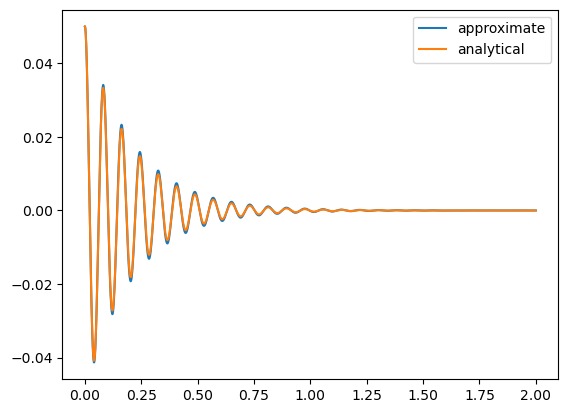

In [6]:
oscillator = SDOFOscillator(5, 50, 30000, 0.0001)
oscillator.compute_analytical()
oscillator.compute_euler()

oscillator.plot_values()